In [1]:
%matplotlib inline

In [2]:
import numpy as np
import openturns as ot
import matplotlib.pyplot as plt
import ctbenchmark as ctb

# Peak problem description

In [3]:
problem = ctb.CentralTendencyPeakProblem()
function = problem.getFunction()
distribution = problem.getDistribution()
problem_name = problem.getName()

In [4]:
problem.getMean()

2.510688027976321

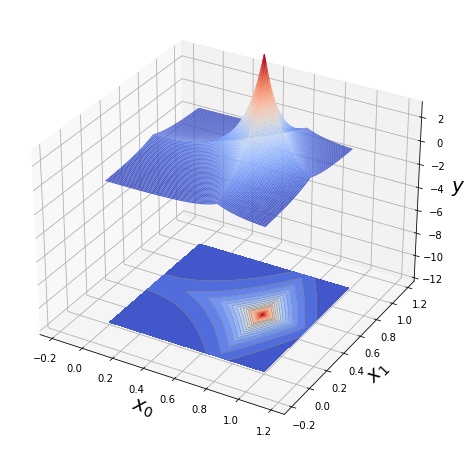

In [5]:
d = ctb.DrawFunctions()
fig = d.draw_full_3D(function, 'Gaussian peak function', -12)
fig

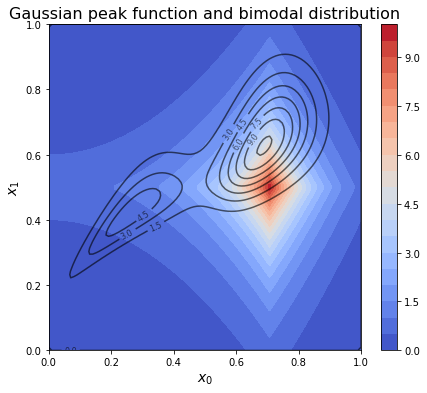

In [6]:
fig = d.draw_2D_controur('Gaussian peak function and bimodal distribution', function, distribution)
fig;

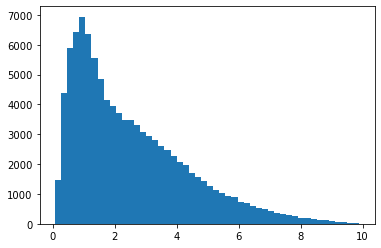

In [7]:
## Output pdf illustration
output_rv = problem.getRandomVector()
output_sample = output_rv.getSample(100000)
plt.hist(np.array(output_sample).flatten(), 50);

# Benchmark

In [8]:
doe_generator = ctb.CentralTendencyBenchmark()
candidate_points = doe_generator.generate_sample('sobol', 2**12, distribution, None)

In [9]:
#x_bench_sizes = list(range(2, 10)) + list(range(10, 100, 5)) + list(range(100, 1500, 100))
#x_bench_sizes = list(range(10, 50,10))
x_bench_sizes = list(range(5, 100, 5)) + list(range(100, 200, 50))
bench = ctb.CentralTendencyBenchmark(['sobol', 'kernel herding', 'support points'], x_bench_sizes)

In [10]:
df_benchmark = bench.run_benchmark([problem], candidate_points)
df_benchmark

START: problem=CT_Peak | method=sobol
START: problem=CT_Peak | method=kernel herding
START: problem=CT_Peak | method=support points
DONE: problem=CT_Peak | method=sobol
DONE: problem=CT_Peak | method=support points
DONE: problem=CT_Peak | method=kernel herding


mu         m        m*  MMD weights sum
Problem Method         Size                                               
CT_Peak kernel herding 5     2.510688  2.430874  2.440365  NaN    0.913742
                       10    2.510688  2.243871  2.288018  NaN    0.965944
                       15    2.510688  2.523144  2.434312  NaN     0.98765
                       20    2.510688  2.464155  2.502767  NaN    0.991512
                       25    2.510688  2.558691  2.462038  NaN    0.993676
...                               ...       ...       ...  ...         ...
        support points 85    2.510688  2.575396  2.510128  NaN    0.996272
                       90    2.510688  2.516919  2.510453  NaN     0.99687
                       95    2.510688   2.51219  2.510384  NaN    0.996896
                       100   2.510688  2.532833  2.515366  NaN    0.996918
                       150   2.510688  2.500095  2.510213  NaN     0.99749

[63 rows x 5 columns]

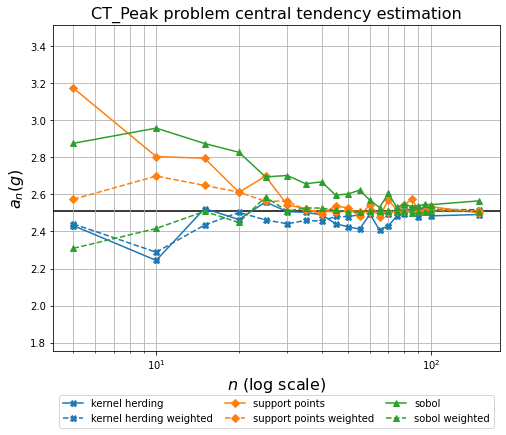

In [11]:
sfile = 'figures/{}_convergence.pdf'.format(problem_name)
figure = bench.plot_ct_benchmark(df_benchmark, problem_name, methods=['kernel herding', 'support points', 'sobol'], save_file=sfile);